In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

Simple datatime operations

In [2]:
date = pd.to_datetime("26th September 2017")
date

Timestamp('2017-09-26 00:00:00')

In [3]:
date + pd.to_timedelta(np.arange(10), 'M')

DatetimeIndex(['2017-09-26 00:00:00', '2017-10-26 10:29:06',
               '2017-11-25 20:58:12', '2017-12-26 07:27:18',
               '2018-01-25 17:56:24', '2018-02-25 04:25:30',
               '2018-03-27 14:54:36', '2018-04-27 01:23:42',
               '2018-05-27 11:52:48', '2018-06-26 22:21:54'],
              dtype='datetime64[ns]', freq=None)

Indexing pandas series or dataframes with time

In [4]:
temp = [45,45.3,45.8,44.8,47,48,49,47,45,47,46,49,50,45,44,47,49,50]
startDate = pd.to_datetime("01th May 2020")
dates = startDate + pd.to_timedelta(np.arange(len(temp)), 'D')
pd.DataFrame(temp, index=dates, columns=['Temperature'])

,Temperature
2020-05-01,45.0
2020-05-02,45.3
2020-05-03,45.8
2020-05-04,44.8
2020-05-05,47.0
2020-05-06,48.0
2020-05-07,49.0
2020-05-08,47.0
2020-05-09,45.0
2020-05-10,47.0


In [5]:
# Note: Passing the 'dates' object as a list is important without which there will be an error
mayTemps = pd.DataFrame(temp, index=pd.MultiIndex.from_arrays([dates], names=['Day'])
                            , columns=['Temperature'])
mayTemps

,Temperature
Day,
2020-05-01,45.0
2020-05-02,45.3
2020-05-03,45.8
2020-05-04,44.8
2020-05-05,47.0
2020-05-06,48.0
2020-05-07,49.0
2020-05-08,47.0
2020-05-09,45.0


In [6]:
pd.Series(temp, index=dates)

2020-05-01    45.0
2020-05-02    45.3
2020-05-03    45.8
2020-05-04    44.8
2020-05-05    47.0
2020-05-06    48.0
2020-05-07    49.0
2020-05-08    47.0
2020-05-09    45.0
2020-05-10    47.0
2020-05-11    46.0
2020-05-12    49.0
2020-05-13    50.0
2020-05-14    45.0
2020-05-15    44.0
2020-05-16    47.0
2020-05-17    49.0
2020-05-18    50.0
dtype: float64

In [7]:
mayTemps['13 may 2020': 'may 15 2020']

,Temperature
Day,
2020-05-13,50.0
2020-05-14,45.0
2020-05-15,44.0


# DateRange

In [8]:
pd.date_range('13 may 2020', 'may 15 2020')

DatetimeIndex(['2020-05-13', '2020-05-14', '2020-05-15'], dtype='datetime64[ns]', freq='D')

In [9]:
pd.date_range('13 may 2020', 'may 29 2020', freq='W')

DatetimeIndex(['2020-05-17', '2020-05-24'], dtype='datetime64[ns]', freq='W-SUN')

In [10]:
# Get three different dates starting from the first argument, with a frequency of a 'day'
pd.date_range('13 may 2020', periods=3, freq='D')

DatetimeIndex(['2020-05-13', '2020-05-14', '2020-05-15'], dtype='datetime64[ns]', freq='D')

In [11]:
# This will give exactly 3 days spread equally between 13.05.2020 and 29.05.2020
pd.date_range('13 may 2020', 'may 29 2020', periods=3)

DatetimeIndex(['2020-05-13', '2020-05-21', '2020-05-29'], dtype='datetime64[ns]', freq=None)

# Resamling, Shifting 

In [12]:
from pandas_datareader import data
tesla = data.DataReader('TSLA', start='2016', end='2020', data_source='yahoo')
tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005
2019-12-30,429.000000,409.260010,428.790009,414.700012,12586400,414.700012
2019-12-31,421.290009,402.079987,405.000000,418.329987,10285700,418.329987


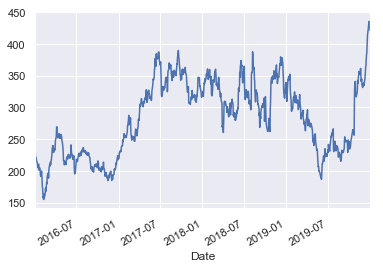

In [13]:
tesla = tesla['High']
tesla.plot()